# 本周内容的概括：
 - 受监督的学习
 - 概率
 - KNN
 - 线性回归
 - 简单的神经网络
 - Naive Bayes

# 1. 概率问题

贝叶斯公式的两种形态：

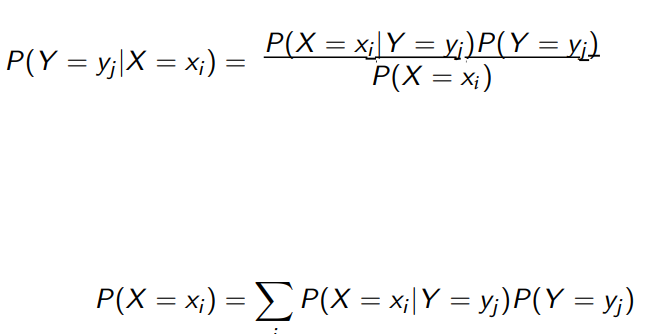

后面都在讲期望，方差，协方差

好像不怎么考，狠狠略过

# 2. KNN

> KNN的训练：
> 
>  - 就是存储所有数据和数据对应的label

> KNN的预测：
> - 用于分类时：
>   - 对于一个新数据点：
>       - 寻找K个最近邻  向量见距离可以用 $norm(\vec{甲}-\vec{乙})$ 计算
>       - 最近邻中最多的label就是新点的label值
> - 用于回归时：
>   - 对于一个新数据点：
>       - 寻找K个最近邻
>       - 赋label值：
>           - 法1：weight = uniform: 将最近邻的label值加起来求平均
>           - 法2：weight = distance: 用距离作为每个邻居加和时的权重，然后把和除以权重的和（归一化） 

回归算法详见Week14 SupervisedLearning.pdf  p11/50

总结：
> - 既可以用于分类又可以用于回归
> - 寻找样本空间中最近的K个点

# 3. 线性回归（Linear Regression）

> 线性回归的目标是一个函数，此函数由两部分组成：
> - 权重$w_i$： 对输入向量中的每一个值乘以一个值
> - 偏置$w_0$：再额外加一个值
> 然后将上述求和。就是这么一个函数。
>
> $f(\vec{x}) = \sum^{n}_{i=1}w_{i}x_{i}+w_{0}$
>

> 那么，问题就转化为：如何寻找一组最合适的权重。
>
> 如何定义最合适？误差最小就叫最合适。
>
> 采取什么参数衡量误差？MSE。可参见上一周的笔记



怎么最小化误差？
> - 法1：将误差式对各个权重值求偏导，算出导为0时权重的值
> - 法2：梯度下降 

>   

总结：
> - 把问题的解看作是一条线或是一个平面
> - 可以算出正解
> - 可以上梯度下降

这个玩意儿能不能用来干分类？能。

>算出的值可以用来作为分欸的判据
>
>实际上，可以将算出来的值塞进sigmoid函数$\sigma$里，再来判断对类的归属
> 也就是说，$f(\vec{x}) = \sigma(\vec{w} · \vec{x})$
>
>可以用梯度下降来算出合适的权重

> 将loss函数选为：$Loss=(y-f(x))^2$
>
> 然后算偏导，进行梯度下降


总结：
> 线性回归提供了一种给一组数据拟合一条线的方法
> 我们可以算出这条线，也可以通过梯度下降学出这条线
> 逻辑回归（上述的分类技巧）提供了一种把数据点分为两类的方法


# 4. （简单的）神经网络

没啥新活，直接上总结吧：
> 多层节点之间靠权重值连接
> 每个节点都把输入给他的加权后结果值加和，并用激活函数算一下
> 用backpropagation训练网络
> backpropagation提供了一种计算隐藏层误差并更新其权重的方法

# 5. Naive Bayes

输入labeled data，可以产生一个似然度分布，来描述这个数据组

>naive的原因：
>
>假设feature空间中的各个量是不互相影响（独立）的。
>
>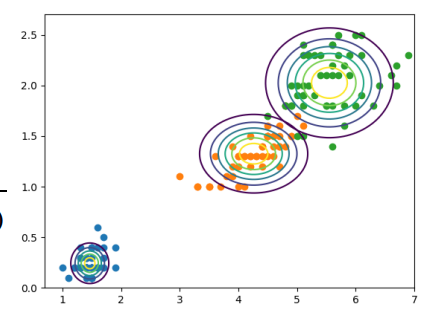
>
>上图中产生的椭圆的长轴都是沿某一轴的，如果是倾斜的，那就不满足naive bayes的假设了

其公式如下：


$
\begin{equation}
x属于某一类的概率 = \frac{x在某一类中出现的概率}{\sum{x在所有类中出现的概率}}
\end{equation}
$

上式中分母是不变的，所以其实就只和分子有关。
$
\begin{equation}
\textbf{估计结果} = 分子 = x属于某一类的概率*这一类出现的概率
\end{equation}
$

那由于有naive bayesian的假设在，
$
\begin{equation}
x属于某一类的概率 = \prod其各个feature成员属于某一类的概率
\end{equation}
$

上式中的连乘实际上不采用，而是采用log的连加。即：
$
\begin{equation}
x属于某一类的概率 = log(某一类出现的概率)+\sum log(各个feature属于某一类的概率)
\end{equation}
$

> 问题进一步简化为：怎么把已有的一类东西（**不要忘了这是有监督的学习**）用一个归属度函数表达？
>
>-  我们用高斯的正态分布估算。
>
> 要计算正态分布，只需要两项指标：各个feature的平均值和标准差
> 
> 新点对于一个正态分布的归属度公式如下：
> $
\begin{equation}
P(x|c) = \frac{1}{SD\sqrt{2\pi}}exp \left(-\frac{1}{2} \left(\frac{x-mean}{SD}\right)^2 \right)
\end{equation}
$
> **此处注意，老师的PDF是错的，PDF里的根号没画到$\pi$上头，但是实际上是用$\sqrt{2\pi}$算的结果。**


例如，对于以下的例子：

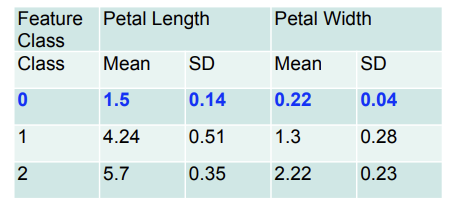

我们有一个新数据点$x=(5,2)$需要被归类，现计算其对class0的归属度作为例子：

In [38]:
import math
import numpy as np

'''
description: 计算一个feature值对给定分布的隶属度的函数
return {隶属度}
'''
def normal_distribution(feature_value, mean, sd):
    return math.log(1/sd/math.sqrt(2*math.pi)*math.exp(-0.5*((feature_value-mean)/sd)**2))

# feature1:
print("featre1:Petal Length:" + str(normal_distribution(5,1.5,0.14)))

# feature2: feature2的计算会报错，因为exp部分太小，exp函数返回了一个0.0，log(0)是非法的
#print("featre2:Petal Width:" + str(normal_distribution(2.0,0.22,0.04)))

featre1:Petal Length:-311.4528256768317


总结：
> 给每个class建构一个概率分布
> 
> 用隶属概率给新点分配标签
> 
> 假设：**feature空间中的一切都是独立的**
> 
> 虽然此处用的是高斯牌正态分布，但也可以换成别的你想要的。都可以

# 6. 作业

本周的作业包含三种有监督的学习方法：KNN，线性回归，naive bayes分类器

In [1]:
# 环境初始化：
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 6.1 KNN 分类器

> 例子是一个10维feature向量的乳腺癌数据集

In [6]:
# 准备数据
from sklearn import datasets
# load dataset and save data and targets into X and Y
X_Y = datasets.load_breast_cancer()

X = X_Y.data
Y = X_Y.target

print('Y的形状：'+str(X.shape))
print('Y的形状：'+str(Y.shape))

print('Y (label) 中的成员：'+str(np.unique(Y)))
print("label的成员只有0和1，所以适合用分类算法解决。")


Y的形状：(569, 30)
Y的形状：(569,)
Y (label) 中的成员：[0 1]
label的成员只有0和1，所以适合用分类算法解决。


In [8]:
# 分割数据集（分成测试和验证）
from sklearn.model_selection import train_test_split
# Split the dataset into Xtr, Xtest, Ytr, Ytest. Xtest and Ytest will form your held-out
# test set. You will later split Xtr and Ytr into training and validation sets.
Xtr, Xtest, Ytr, Ytest = train_test_split(X,Y,test_size=0.2)

In [9]:
# KNN 调库侠方法：（自己的手写我感觉意义不大，想看就看Week14Labsheet吧）

# Import KNeighborClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Instantiate the classifier with 3 neighbors
knn = KNN(n_neighbors = 3)

#Fit the classifier on the training data
knn.fit(Xtr,Ytr)

#Make a prediction on the training data
knn.predict(Xtr)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [19]:
# 性能指标衡量：

from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error
Ypred_result = knn.predict(Xtest)

print("Precision: "+str(precision_score(Ytest,Ypred_result,average = "macro")))
print("Recall: "+str(recall_score(Ytest,Ypred_result,average = "macro")))
print("Accuracy: "+str(accuracy_score(Ytest,Ypred_result)))
print("MSE: "+str(mean_squared_error(Ytest,Ypred_result)))


Precision: 0.952922077922078
Recall: 0.9403409090909092
Accuracy: 0.9473684210526315
MSE: 0.05263157894736842


下面还有一段用KFold交叉验证来检查最优邻居数的，我就略过了

## 6.2 Naive Bayes

In [20]:
# 调库侠方法：手写版省略了

from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier (use the parameter var_smoothing=0.0),
gnb = GaussianNB(var_smoothing=0.0)
# fit, and predict the classes
gnb.fit(Xtr,Ytr)
Ypred_result = gnb.predict(Xtest)



In [21]:
# 性能参数

print("Precision: "+str(precision_score(Ytest,Ypred_result,average = "macro")))
print("Recall: "+str(recall_score(Ytest,Ypred_result,average = "macro")))
print("Accuracy: "+str(accuracy_score(Ytest,Ypred_result)))
print("MSE: "+str(mean_squared_error(Ytest,Ypred_result)))

Precision: 0.9583333333333333
Recall: 0.9375
Accuracy: 0.9473684210526315
MSE: 0.05263157894736842


## 6.3 线性回归

In [23]:
# 调库
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
# 运行模型

lr.fit(Xtr,Ytr)
pred_Ytest = lr.predict(Xtest)

Text(0, 0.5, 'Ground Truth')

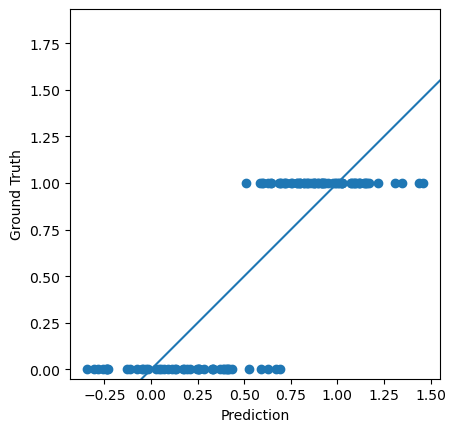

In [29]:
# 可视化结果对比：
plt.scatter(pred_Ytest,Ytest)
plt.axis("square")
plt.axline([0,0],[1,1])
plt.xlabel('Prediction')
plt.ylabel("Ground Truth")

In [31]:
# 性能参数：

print("MSE: "+str(mean_squared_error(Ytest,pred_Ytest)))

MSE: 0.0690755044973203


## 6.4 多项式拟合



没明白，算了

## 6.5 单层神经网络

In [37]:
# 调库：
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

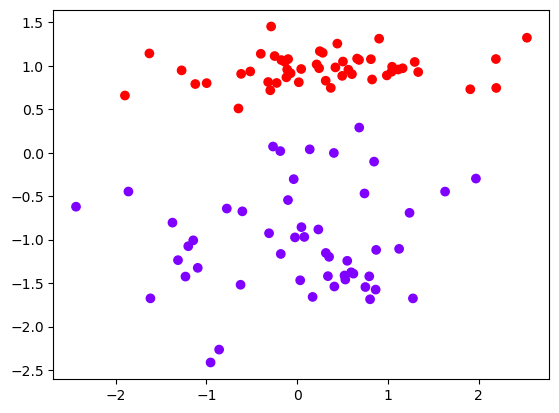

In [38]:
# 准备数据：
X1, y1 = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1)
fig1, ax1 = plt.subplots();
ax1.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()

In [39]:
# 初始化模型
nn1=Perceptron(alpha=1, max_iter=1000) 
model=nn1.fit(X1,y1)

(-3.0, 3.0)

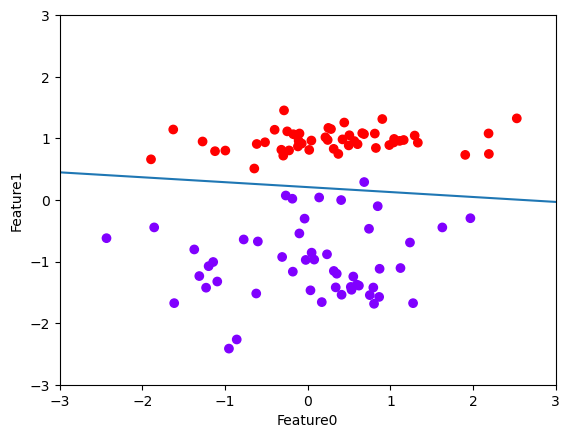

In [40]:
# 画出练出来的线
_ = nn1.coef_
_ = _[0]

fig1, ax1 = plt.subplots();
ax1.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.xlabel("Feature0")
plt.ylabel("Feature1")

# 算分界线： 取label（y）=0.5
# w0*x0+w1*x1=0.5 解算x1x0之间的斜率和偏置。
a = -_[0]/_[1]
b = 1/(2*_[1])

plt.plot([-100,100],[-100*a+b,100*a+b])
plt.xlim([-3,3])
plt.ylim([-3,3])

1.0


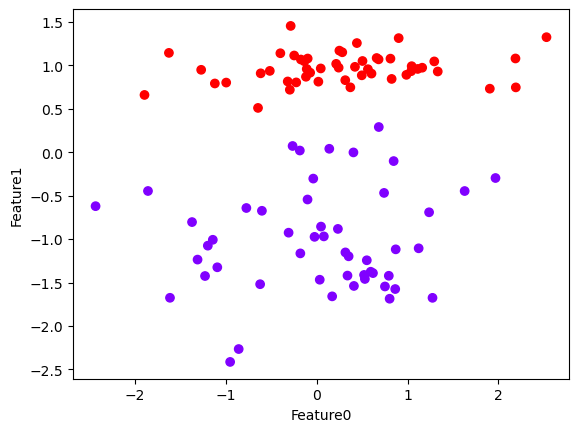

In [41]:
# 用练出来的模型算预测结果并可视化：
ypred1=model.predict(X1)
# TODO: Make a scatter plot of the predictions.
fig1, ax1 = plt.subplots();
ax1.scatter(X1[:,0],X1[:,1],c=ypred1, cmap='rainbow')
plt.xlabel("Feature0")
plt.ylabel("Feature1")
# How do the predictions compare with the ground truth? Compute the accuracy to compare

nn1acc = accuracy_score(y1,ypred1)
print(nn1acc)

## 6.6 多层神经网络（以Toy问题为例：）

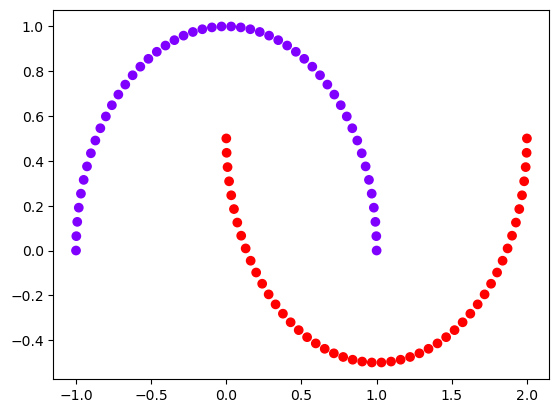

In [42]:
# 初始化数据集：
X2, y2 = make_moons()
fig2, ax2 = plt.subplots()
ax2.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')

单层神经网络无法达到分类所需的函数了。不够复杂。


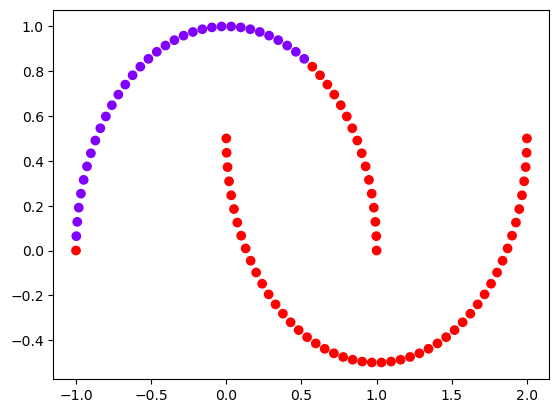

In [43]:
# 将单层神经网络用于上述问题：
nn2 = Perceptron(alpha=1, max_iter=1000)
model = nn2.fit(X2,y2)

ypred2 = model.predict(X2)
fig2, ax2 = plt.subplots()
ax2.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
print("单层神经网络无法达到分类所需的函数了。不够复杂。")

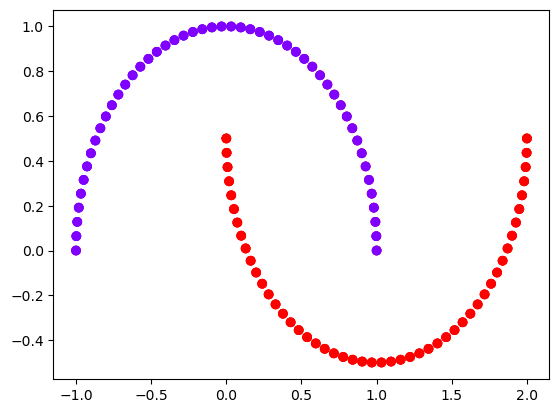

In [46]:
# 加四个隐藏层：
nn2=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000)
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)
ax2.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
fig2

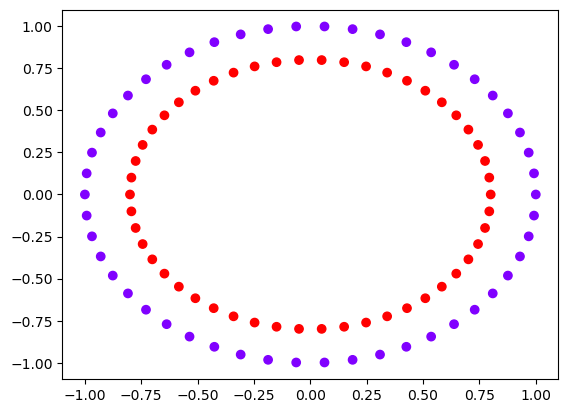

In [47]:
# 再来一个俩圆圈的数据集，测试激活函数的威力
X3, y3 = make_circles()
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=y3, cmap='rainbow')
plt.show()

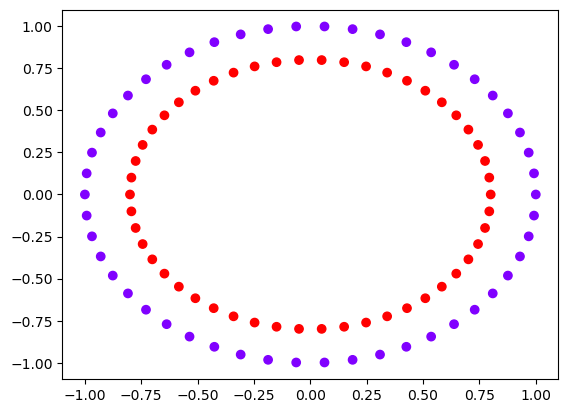

In [50]:
# 四层隐层带relu：其实这个四层不带relu也行了
nn4 = MLPClassifier(hidden_layer_sizes=(10,10,10,10),max_iter=1000,activation="relu")
model4 = nn4.fit(X3,y3)
ypred4 = nn4.predict(X3)

fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=ypred4, cmap='rainbow')